In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
df.drop('PatientID',axis=1,inplace=True)

In [4]:
df.drop('DoctorInCharge',axis=1,inplace=True)

In [5]:
df.shape

(2392, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

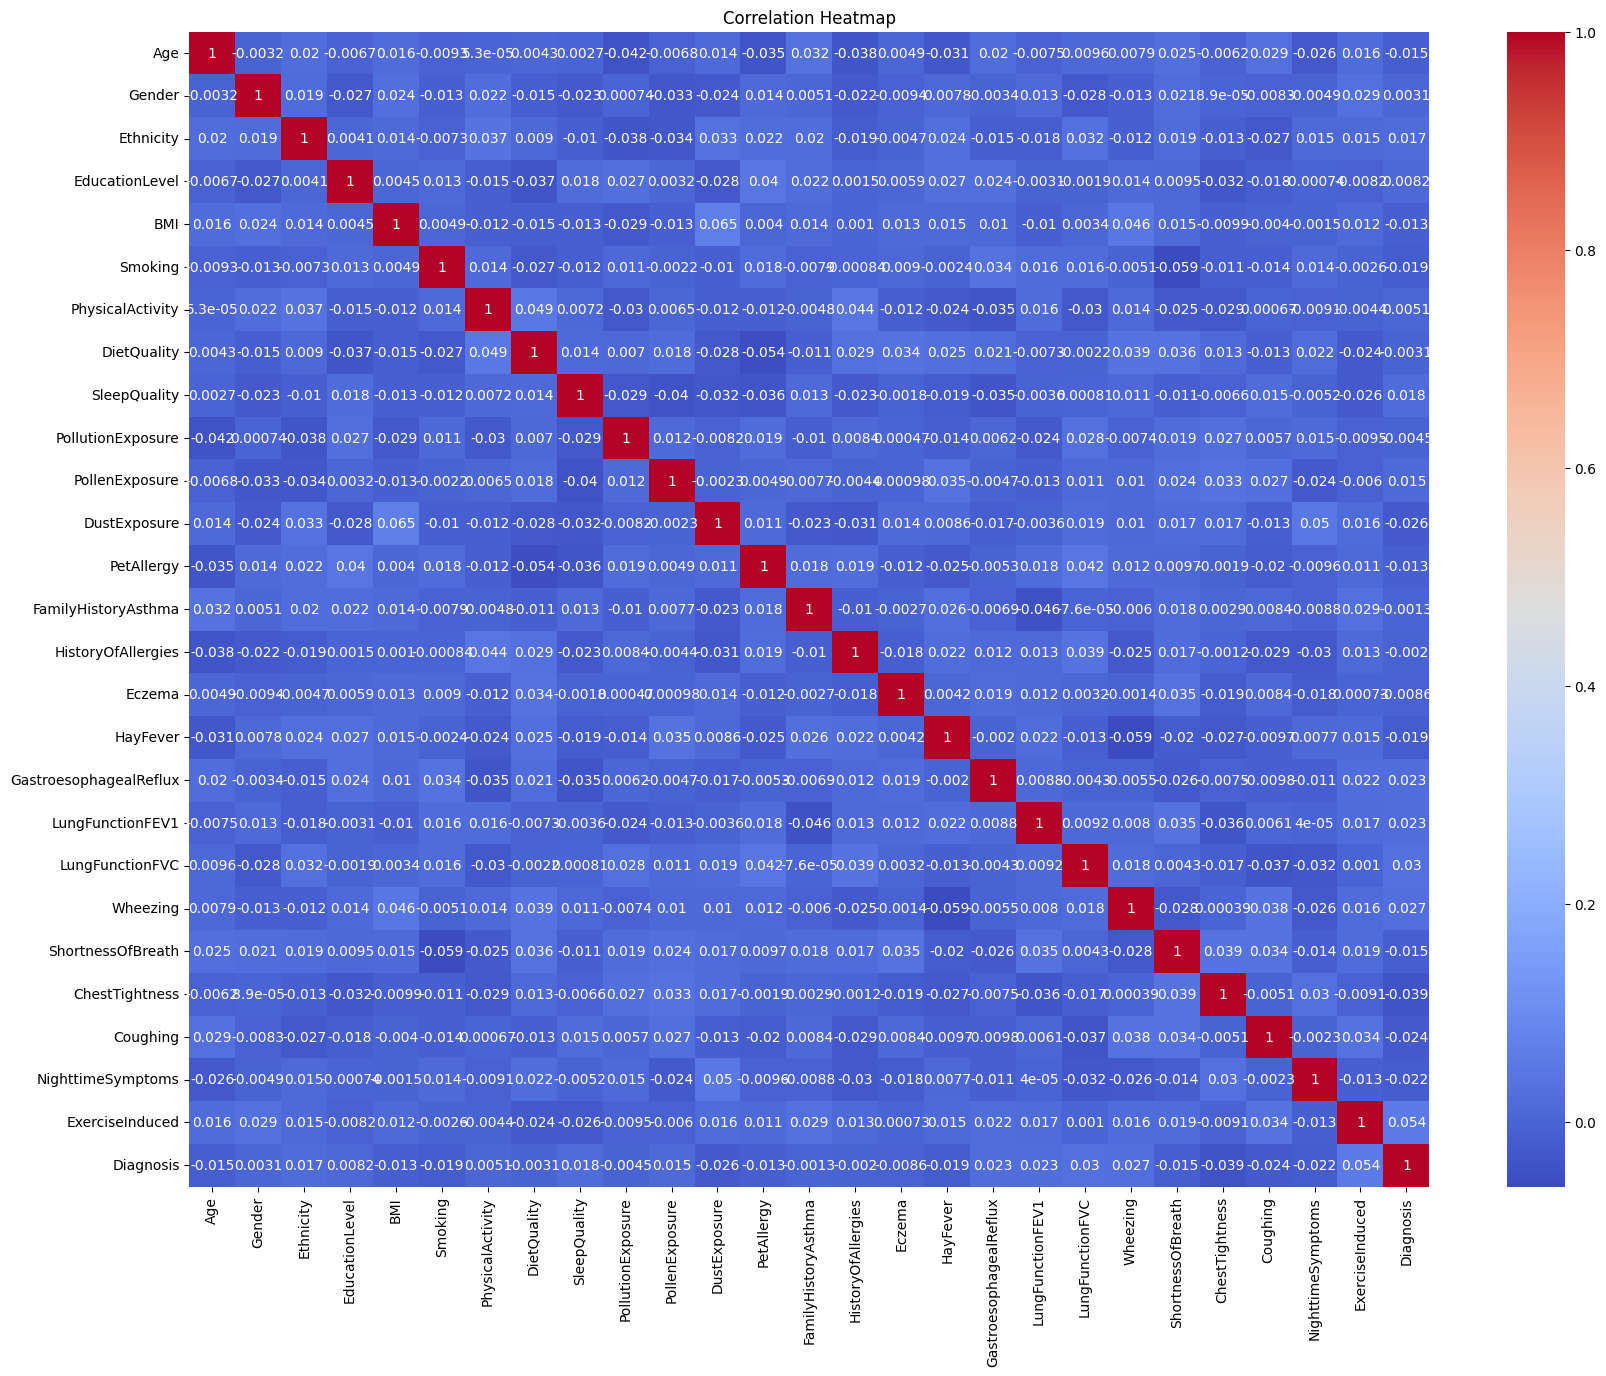

In [7]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.isnull().sum()

Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

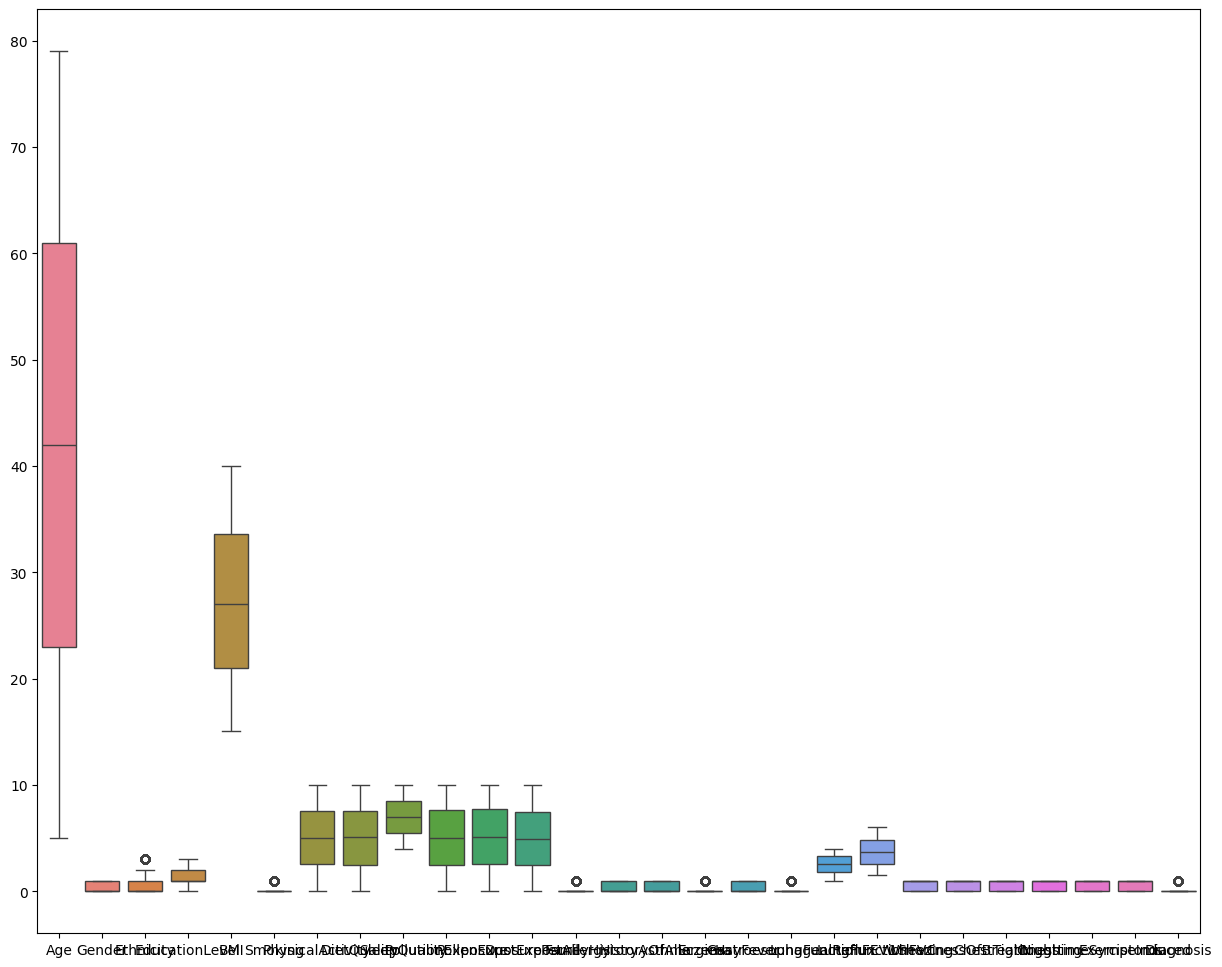

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

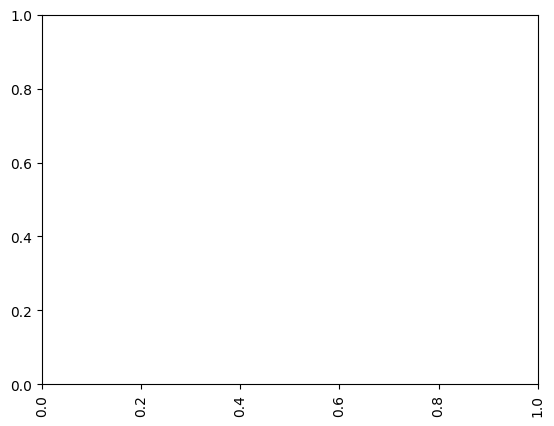

In [13]:
plt.figure(figsize=(15,12))
sns.boxplot(df)
plt.show()
plt.xticks(rotation=90)

In [39]:
No = df[df['Diagnosis']==0]
Yes = df[df['Diagnosis']==1]

In [40]:
No.shape

(2268, 27)

In [41]:
Yes.shape

(124, 27)

OverSampling

In [16]:
X1 = df.drop('Diagnosis',axis=1)
y1 = df['Diagnosis']

In [42]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smote_tomek = SMOTETomek(random_state=42)
X1, y1 = smote_tomek.fit_resample(X1, y1)


In [43]:
X1.shape

(4534, 26)

In [44]:
y1.shape

(4534,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = lr.predict(X_test)

In [62]:
lr.score(X_train,y_train)

0.8488235294117648

In [63]:
lr.score(X_test,y_test)

0.8668430335097002

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred = gnb.predict(X_test)

In [49]:
gnb.score(X_train,y_train)

0.803235294117647

In [50]:
gnb.score(X_test,y_test)

0.8298059964726632

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8298059964726632


In [64]:
param_grid = {
    'var_smoothing': [0.01,0.1,1,10]
    }

In [53]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [54]:
grid_search.best_params_

{'var_smoothing': 0.01}

In [55]:
grid_search.best_score_

0.8038235294117648

In [56]:
input_data = (26,1,2,2,22.757042093725453,0,5.897329493528446,6.341014020966575,5.1539663695461675,1.9698383357954974,7.457664777651035,6.58463121025545,0,0,1,0,0,0,2.1977673320193754,1.7023934274209584,1,0,0,1,1,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = gnb.predict(input_data_reshaped)
print(prediction)

[0]


In [57]:
input_data = (39,1,0,0,38.521248141304675,0,7.799709994679064,3.771712830938058,7.567293786847818,1.3100825517235815,4.200539113020635,1.691666044943776,0,0,0,0,1,0,2.6336525563599436,2.6303763247241934,1,0,0,0,0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = gnb.predict(input_data_reshaped)
print(prediction)

[0]


In [38]:
#0 - No Asthma
#1 - Asthma

In [34]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [35]:
2268/4

567.0

In [36]:
124/4

31.0

In [59]:
input_data = (18,1,0,1,20.740849877951756,0,5.805180181824985,4.386992163822873,7.731192173321199,7.733982864859832,2.2790728231725534,6.467701122600563,0,0,0,1,0,0,1.1329772781247809,5.50950203493698,0,0,0,1,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = gnb.predict(input_data_reshaped)
print(prediction)

[0]


In [ ]:
#26,1,2,2,22.757042093725453,0,5.897329493528446,6.341014020966575,5.1539663695461675,1.9698383357954974,7.457664777651035,6.58463121025545,0,0,1,0,0,0,2.1977673320193754,1.7023934274209584,1,0,0,1,1,1


In [65]:
input_data = (18,1,0,1,20.740849877951756,0,5.805180181824985,4.386992163822873,7.731192173321199,7.733982864859832,2.2790728231725534,6.467701122600563,0,0,0,1,0,0,1.1329772781247809,5.50950203493698,0,0,0,1,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lr.predict(input_data_reshaped)
print(prediction)

[0]
